# Описание проекта
<br/>
<br/>Провести анализ для крупного интернет-магазинаи подготовить список гипотез для увеличения выручки.

**Выполненные шаги:**
<br>[1. Открытие данных](#section_id_0)
<br>[1.1. Предобработка](#section_id_1)
<br>[Шаг 2. Приоритизация гипотез](#section_id_2)
<br>[Шаг 3. A/B тест](#section_id_3)
<br>[Шаг 4. Вывод](#section_id_4)

# Шаг 1. Загрузите данные и подготовьте их к анализу <a id='section_id_0'></a>

**Импортируем библиотеки**

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import scipy.stats as st
import math

from matplotlib import pyplot as plt
%matplotlib inline
from datetime import datetime, timedelta

import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.float_format', '{:,.3f}'.format)

**Создаем датафреймы**

In [2]:
hypothesis = pd.read_csv('/datasets/hypothesis.csv')
orders = pd.read_csv('/datasets/orders.csv')
visitors = pd.read_csv('/datasets/visitors.csv')

**Проверим каждый датафрейм**

In [3]:
display(hypothesis.head(5))

,Hypothesis,Reach,Impact,Confidence,Efforts
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6
1,"Запустить собственную службу доставки, что сок...",2,5,4,10
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3
3,"Изменить структура категорий, что увеличит кон...",8,3,3,8
4,"Изменить цвет фона главной страницы, чтобы уве...",3,1,1,1


In [4]:
#hypothesis.info()

In [5]:
display(orders.head(5))

,transactionId,visitorId,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
2,2961555356,4069496402,2019-08-15,400,A
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B


In [6]:
#orders.info()

In [7]:
display(visitors.head(5))

,date,group,visitors
0,2019-08-01,A,719
1,2019-08-02,A,619
2,2019-08-03,A,507
3,2019-08-04,A,717
4,2019-08-05,A,756


In [8]:
#visitors.info()

**Вывод**
</br>
1)Файл hypothesis - Поменять регистр
</br>
2)Файл orders - transactionId, visitorId - поменять регистр, добавить нижнее подчеркивание, date меняем object на datetime
</br>
3)Файл visitors - date меняем object на datetime

**Проверяем пропуски**

In [9]:
hypothesis.isna().sum().sort_values(ascending = False)

Hypothesis    0
Reach         0
Impact        0
Confidence    0
Efforts       0
dtype: int64

In [10]:
orders.isna().sum().sort_values(ascending = False)

transactionId    0
visitorId        0
date             0
revenue          0
group            0
dtype: int64

In [11]:
visitors.isna().sum().sort_values(ascending = False)

date        0
group       0
visitors    0
dtype: int64

**Проверяем дубликаты**

In [12]:
display('Дубликаты в таблице hypothesis:', hypothesis.duplicated().sum())
display('Дубликаты в таблице orders:', orders.duplicated().sum())
display('Дубликаты в таблице visitors:', visitors.duplicated().sum())

'Дубликаты в таблице hypothesis:'

0

'Дубликаты в таблице orders:'

0

'Дубликаты в таблице visitors:'

0

**Вывод**
</br>
Пропусков и дубликатов нет

# Предобработка данных <a id='section_id_1'></a>

**Меняем тип данных в столбцах**

In [13]:
orders['date'] = pd.to_datetime(orders['date'], format='%Y-%m-%d %H:%M:%S')
visitors['date'] = pd.to_datetime(visitors['date'], format='%Y-%m-%d %H:%M:%S')

**Приводим названия столбцов к нижнему регистру с нижним подчеркиванием**

In [14]:
hypothesis.columns = map(str.lower, hypothesis.columns)
orders.columns = map(str.lower, orders.columns) 
visitors.columns = map(str.lower, visitors.columns) 

**Добавим нижнее подчеркивание**

In [15]:
orders.columns = orders.columns.str.replace("transactionid", "transaction_id")
orders.columns = orders.columns.str.replace("visitorid", "visitor_id")

**Вывод**
Предобработка завершена. Названия столбцов приведены к нижнему регистру. Названия столбцов заменены на названия с нижним подчеркиванием. Изменены типы данных.

# Шаг 2. Приоритизация гипотез <a id='section_id_2'></a>

**Фреймворк ICE для приоритизации гипотез**

In [16]:
hypothesis['ICE'] = hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [17]:
hypothesis.sort_values('ICE', ascending=False).head()

,hypothesis,reach,impact,confidence,efforts,ICE
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000


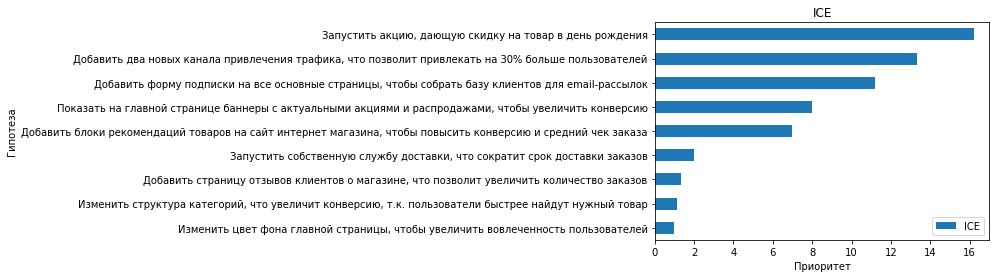

In [18]:
hyp = hypothesis[['hypothesis', 'ICE']].set_index('hypothesis').sort_values('ICE', ascending=True).plot(kind='barh')
hyp.set_xlabel('Приоритет')
hyp.set_ylabel('Гипотеза')
hyp.set_title('ICE')
plt.show()

**Фреймворк RICE для приоритизации гипотез.**

In [19]:
hypothesis['RICE'] = hypothesis['reach'] * hypothesis['impact'] * hypothesis['confidence'] / hypothesis['efforts']

In [20]:
hypothesis.sort_values('RICE', ascending=False).head()

,hypothesis,reach,impact,confidence,efforts,ICE,RICE
7,Добавить форму подписки на все основные страни...,10,7,8,5,11.200,112.000
2,Добавить блоки рекомендаций товаров на сайт ин...,8,3,7,3,7.000,56.000
0,"Добавить два новых канала привлечения трафика,...",3,10,8,6,13.333,40.000
6,Показать на главной странице баннеры с актуаль...,5,3,8,3,8.000,40.000
8,"Запустить акцию, дающую скидку на товар в день...",1,9,9,5,16.200,16.200


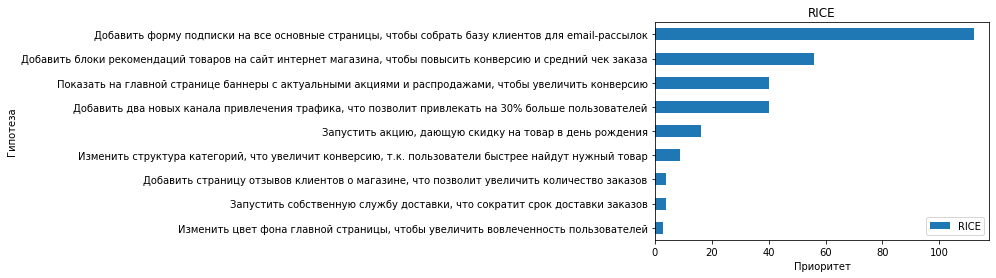

In [21]:
hyp_r = hypothesis[['hypothesis', 'RICE']].set_index('hypothesis').sort_values('RICE', ascending=True).plot(kind='barh')
hyp_r.set_xlabel('Приоритет')
hyp_r.set_ylabel('Гипотеза')
hyp_r.set_title('RICE')
plt.show()

**Вывод** 
</br>
*Почему изменилась приоритизация гипотез?*
</br>
Перспективные гипотезы ICE - 8, 0, 7
</br>
Перспективные гипотезы RICE - 7, 0, 2
</br>
Как видим, разница в одной гипотезе и в их перспективности. В первом случае 7 гипотеза занимает 3-е место, во втором случае 7 гитопеза является самой перспективной. 0 гипотеза стабильно на втором месте.
Также разница в том,что в RICE формуле учитывается охват, в ICE формуле - нет. 7 гипотеза затронет большинство количества пользователей. В ICE мы не учитываем количество пользователей, которое затронет изменение, поэтому 7 гипотеза занимает последнее место.В то время как 8 гипотеза имеет высокую оценку параметров impact и confidence, следовательно, данная гипотеза сильно повлияет на пользователей.
</br>
Выбор гипотез зависит от того, какой конечный результат мы преследуем. Если нужен большой охват - используем гипотезы RICE, если интересует влияние на пользователя, его удовлетворенность, то используем гипотезы ICE.

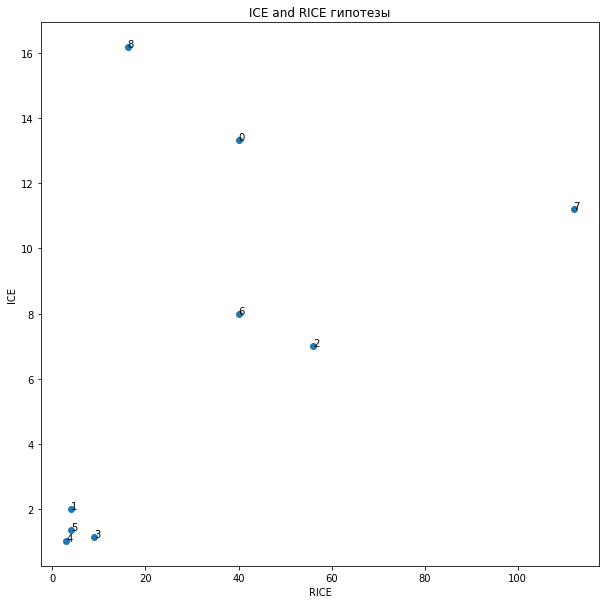

In [22]:
y = hypothesis['ICE'] 
z = hypothesis['RICE'] 
n = hypothesis.index 

fig, ax = plt.subplots()
ax.scatter(z, y)

for i, txt in enumerate(n):
    ax.annotate(txt, (z[i], y[i]))

plt.title("ICE and RICE гипотезы") 
plt.xlabel("RICE") 
plt.ylabel("ICE")

fig.set_figheight(10)
fig.set_figwidth(10) 
plt.show()

# Шаг 3. А/B тест <a id='section_id_3'></a>

Проверим начало и окончание теста

In [23]:
display('Начало теста:', visitors['date'].min())


'Начало теста:'

Timestamp('2019-08-01 00:00:00')

In [24]:
display('Конец теста:', visitors['date'].max())

'Конец теста:'

Timestamp('2019-08-31 00:00:00')

Проверим пользователей, состоящих в 2 группах

In [25]:
duplicated_users = orders.groupby('visitor_id').agg({'group':['nunique','unique']})
duplicated_users.columns = ['groups', 'group_names']
duplicated_users = duplicated_users.query('groups>1')
display(duplicated_users.head())

,groups,group_names
visitor_id,,
8300375,2,"[B, A]"
199603092,2,"[A, B]"
232979603,2,"[B, A]"
237748145,2,"[B, A]"
276558944,2,"[B, A]"


In [26]:
display(duplicated_users.count())

groups         58
group_names    58
dtype: int64

**Вывод**
</br>
58 дубликатов, которые состоят в 2 группах одновременно. Это может испортить результат теста. Удалим этих пользователей и проверим дубликаты.

In [27]:
clear_orders = orders.query('visitor_id not in @duplicated_users.index')
display(clear_orders)

,transaction_id,visitor_id,date,revenue,group
0,3667963787,3312258926,2019-08-15,1650,B
1,2804400009,3642806036,2019-08-15,730,B
3,3797467345,1196621759,2019-08-15,9759,B
4,2282983706,2322279887,2019-08-15,2308,B
5,182168103,935554773,2019-08-15,2210,B
...,...,...,...,...,...
1191,3592955527,608641596,2019-08-14,16490,B
1192,2662137336,3733762160,2019-08-14,6490,B
1193,2203539145,370388673,2019-08-14,3190,A
1194,1807773912,573423106,2019-08-14,10550,A


In [28]:
u_users = clear_orders.groupby('visitor_id').agg({'group':['nunique','unique']})
u_users.columns = ['groups', 'group_names']
u_users = u_users.query('groups>1')
display(u_users.count())

groups         0
group_names    0
dtype: int64

In [29]:
display(f'Удаленных покупателей {len(duplicated_users)/len(orders["visitor_id"].unique()):.2%}')

'Удаленных покупателей 5.63%'

**Вывод**
</br> Дуликаты удалены

In [30]:
orders_grouped = (orders.groupby(['date','group'], as_index=False)
                        .agg({'transaction_id':'nunique','visitor_id':'nunique','revenue':'sum'}))\
                        .rename(columns={'transaction_id':'orders','visitor_id':'buyers'})
orders_grouped['group_copy'] = orders_grouped['group']
orders_grouped = orders_grouped.set_index(['date','group'])
orders_cumsum = orders_grouped.sort_values(['date','group']).groupby('group_copy').cumsum().reset_index()

Посчитаем сумму визитов по дням в каждой группе

In [31]:
visitors_cumsum = visitors.groupby(['date','group'], as_index=False).agg({'visitors':'sum'}).sort_values(['date','group'])
visitors_cumsum['group_copy'] = visitors_cumsum['group']
visitors_cumsum = visitors_cumsum.set_index(['date','group']).groupby('group_copy').cumsum().reset_index()

In [32]:
cummulative = orders_cumsum.join(visitors_cumsum[['visitors']])
cummulative['avg_check'] = cummulative['revenue'] / cummulative['orders']
cummulative['conversion'] = cummulative['orders'] / cummulative['visitors']

In [33]:
cummulative.head()

,date,group,orders,buyers,revenue,visitors,avg_check,conversion
0,2019-08-01,A,24,20,148579,719,"6,190.792",0.033
1,2019-08-01,B,21,20,101217,713,"4,819.857",0.029
2,2019-08-02,A,44,39,242401,1338,"5,509.114",0.033
3,2019-08-02,B,45,43,266748,1294,"5,927.733",0.035
4,2019-08-03,A,68,63,354874,1845,"5,218.735",0.037


Проверим совпадают ли минимальная и максимальная даты в этом датафрейме с минимальной и максимальной датой в исходных данных. В исходных данных начало 2019-08-01, конец 2019-08-31

In [34]:
cummulative['date'].min()

Timestamp('2019-08-01 00:00:00')

In [35]:
cummulative['date'].max()

Timestamp('2019-08-31 00:00:00')

**Вывод**
<br/>Даты совпадают

### График кумулятивной выручки

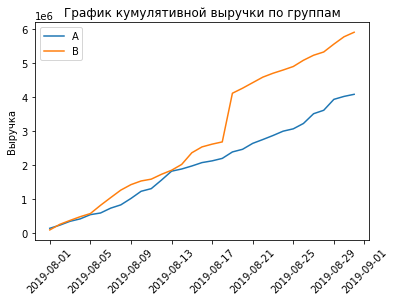

In [36]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'revenue']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'revenue']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('График кумулятивной выручки по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Вывод**
</br>
У группы А выручка равномерно росла в течении всего теста, у группы B был резкий скачок в середине месяца, после которого выручка опять стабильно увеличивалась, но на более высоком уровне.
Есть два варианта: либо попали дорогие заказы в выборку, либо выбросы.


### График кумулятивного среднего чека по группам.

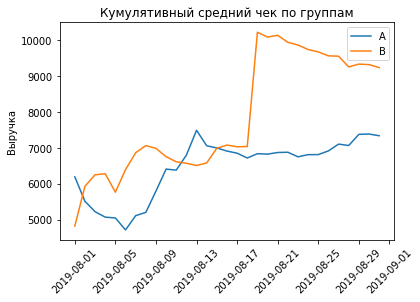

In [37]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'avg_check']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'avg_check']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('Кумулятивный средний чек по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Вывод**
</br>
Та же картина наблюдается и на этом графике. Впрочем у группы А тоже есть рост, хотя, по сранению с группой В, он кажется более равномерным

### График относительного изменения кумулятивного среднего чека группы B к группе A

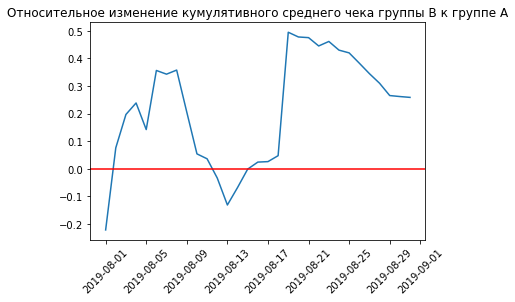

In [38]:
temp = (cummulativeA[['date','avg_check']].merge(cummulativeB[['date', 'avg_check']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['avg_check_B'] / temp['avg_check_A']-1)
plt.title('Относительное изменение кумулятивного среднего чека группы B к группе A')
plt.axhline(y=0, color='red', linestyle='-')
plt.xticks(rotation=45)
plt.show()

**Вывод**
</br>
Все три графика подтверждают уже ранее сделанные выводы. В нескольких точках график различия между средним чеком по группам резко возрастает, а значит были либо дорогие заказы, либо выбросы. Будем искать

### График кумулятивной конверсии по группам

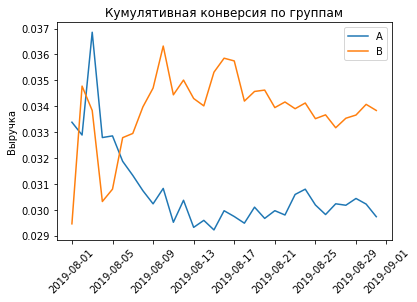

In [39]:
cummulativeA = cummulative[cummulative['group']=='A'][['date', 'conversion']]
cummulativeB = cummulative[cummulative['group']=='B'][['date', 'conversion']]
plt.plot(cummulativeA.iloc[:,0].to_frame(), cummulativeA.iloc[:,1].to_frame(), label='A' )
plt.plot(cummulativeB.iloc[:,0].to_frame(), cummulativeB.iloc[:,1].to_frame(), label='B')
plt.title('Кумулятивная конверсия по группам')
plt.ylabel("Выручка")
plt.xticks(rotation=45)
plt.legend()
plt.show()

**Вывод**
</br>
Группа В показывает конверсию выше, чем группа А. А-конверсия находится в среднем на уровне от 0,029 до 0,031, а В-конверсия на уровне от 0,036 и до 0,033.

### График относительного изменения кумулятивной конверсии группы B к группе A

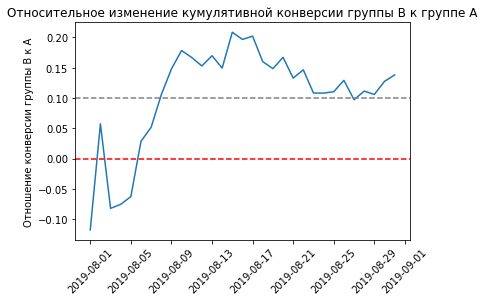

In [40]:
temp = (cummulativeA[['date', 'conversion']].merge(cummulativeB[['date', 'conversion']], 
                                            left_on='date', right_on='date', how='left', suffixes=['_A', '_B']))
plt.plot(temp['date'], temp['conversion_B'] / temp['conversion_A']-1)
plt.title('Относительное изменение кумулятивной конверсии группы B к группе A')
plt.ylabel('Отношение конверсии группы В к А')
plt.axhline(y=0, color='red', linestyle='--')
plt.axhline(y=0.1, color='grey', linestyle='--')
plt.xticks(rotation=45)
plt.show()

**Вывод**
</br>
Несмотря на провал вначале, конверсия В стабильно выше 10%


### Точечный график количества заказов по пользователям

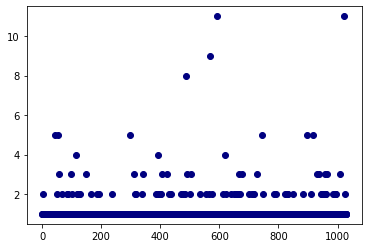

In [41]:
orders_user = orders.groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})\
                         .rename(columns={'transaction_id':'orders'})
x_values = pd.Series(range(0,len(orders_user['orders'])))
plt.scatter(x_values, orders_user['orders'], color='navy')
plt.show()

**Вывод**
</br>
Как мы видим, подавляющее большинство делает максимум до 3 покупок. В основном все же 1-2 покупки стабильно. Есть либо выбросы, либо некоторые люди делают до 11 покупок в нашем магазине. Проверим по перцентилям

### 95-й и 99-й перцентили количества заказов на пользователя

In [42]:
display('90 перцентиль: %.2f' % (np.percentile(orders_user['orders'], [90])))
display('95 перцентиль: %.2f' % (np.percentile(orders_user['orders'], [95])))
display('99 перцентиль: %.2f' % (np.percentile(orders_user['orders'], [99])))

'90 перцентиль: 1.00'

'95 перцентиль: 2.00'

'99 перцентиль: 4.00'

**Вывод**
</br>
В основном все делают 1 заказ. Не более 5% пользователей оформляли 2 заказа. И 10% пользователей оформляли больше 1 заказа. Предлагаю считать более 4 заказов аномальными (99 перцентиль)

### Распределения сумм заказов на одного пользователя

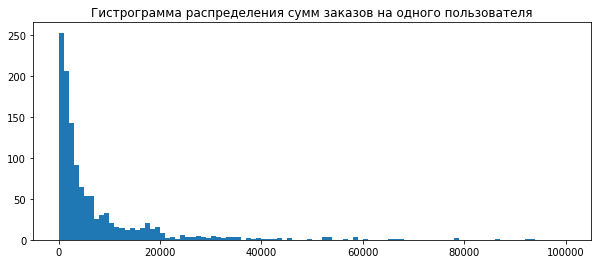

In [43]:
plt.figure(figsize=(10,4))
plt.hist(orders['revenue'], range=(0,100000), bins = 100)
plt.title('Гистрограмма распределения сумм заказов на одного пользователя')
plt.show()
x_values = pd.Series(range(0, len(orders)))

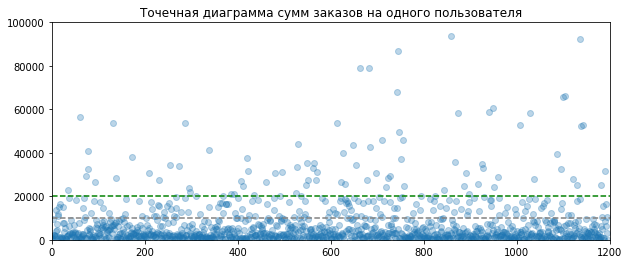

In [44]:
plt.figure(figsize=(10,4))
plt.scatter(x_values, orders['revenue'], alpha=.3)
plt.title('Точечная диаграмма сумм заказов на одного пользователя')
plt.axis([0, 1200, 0, 100000])
plt.axhline(y=10000, color='grey', linestyle='--')
plt.axhline(y=20000, color='green', linestyle='--')
plt.show()

**Вывод**
</br>
БОльшая часть заказов не дороже 10 тысяч, но все же много заказов до 20 тысяч. Более дорогие заказы случаются намного реже.

### 95-й и 99-й перцентили стоимости заказов

In [45]:
display('90 перцентиль: %.0f' % (np.percentile(orders['revenue'], [90])))
display('95 перцентиль: %.0f' % (np.percentile(orders['revenue'], [95])))
display('99 перцентиль: %.0f' % (np.percentile(orders['revenue'], [99])))

'90 перцентиль: 18168'

'95 перцентиль: 28000'

'99 перцентиль: 58233'

Посмотрим, какие самые дорогие заказы случались в магазине

In [46]:
orders['revenue'].max()

1294500

**Вывод**
</br>
Как я и предполагала, бОльшая часть заказов до 20 тысяч. 5% делает заказы до 30 тыся, 1% до 60 тысяч. Соответсвенно, все заказы свыше 60 тысяч редкие. Будем считать их аномальными. Самый дорогой заказ за 1294500 явно аномальный.

### Статистическая значимость различий в конверсии между группами по «сырым» данным

In [47]:
orders_a = orders[orders['group']=='A'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
orders_a.columns = ['visitorId', 'orders']
orders_b = orders[orders['group']=='B'].groupby('visitor_id', as_index=False).agg({'transaction_id':'nunique'})
orders_b.columns = ['visitor_id', 'orders']
display('Кол-во покупателей в группе A: {}'.format(len(orders_a)))
display('Кол-во покупок в группе А: {}'.format(orders_a['orders'].sum()))
display('Кол-во посетителей в группе A: {}'.format(visitors[visitors['group']=='A']['visitors'].sum()))
display('Кол-во покупателей в группе B: {}'.format(len(orders_b)))
display('Кол-во покупок в группе B: {}'.format(orders_b['orders'].sum()))
display('Кол-во посетителей в группе B: {}'.format(visitors[visitors['group']=='B']['visitors'].sum()))

'Кол-во покупателей в группе A: 503'

'Кол-во покупок в группе А: 557'

'Кол-во посетителей в группе A: 18736'

'Кол-во покупателей в группе B: 586'

'Кол-во покупок в группе B: 640'

'Кол-во посетителей в группе B: 18916'

Разделим пользователей по группам и проверим гипотезы:
<br/> H0: По неочищенным данным в конверсии групп A и B нет статистически значимых различий
<br/> H1: По неочищенным данным в конверсии групп A и B есть статистически значимые различия

In [48]:
list_1 =[]
for i in range(0,(visitors[visitors['group']=='A']['visitors'].sum()-len(orders_a))):
    list_1.append(0)
orders_by_non_purchased_users_A = pd.Series(data = list_1, name = 'orders')

list_2 =[]
for i in range(0,(visitors[visitors['group']=='B']['visitors'].sum()-len(orders_b))):
    list_2.append(0)
orders_by_non_purchased_users_B = pd.Series(data = list_2, name = 'orders')

sampleA = pd.concat([orders_a['orders'], orders_by_non_purchased_users_A], axis=0)
sampleB = pd.concat([orders_b['orders'], orders_by_non_purchased_users_B], axis=0)
print('Относительный прирост конверсии группы B по отношению к группе A: {:.3f}'.format(sampleB.mean()/sampleA.mean()-1))
alpha = 0.05
results = st.mannwhitneyu(sampleA, sampleB)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

Относительный прирост конверсии группы B по отношению к группе A: 0.138
P-value: 0.016792355056752608
Отвергаем нулевую гипотезу


**Вывод**
<br/>
По неочищенным данным в конверсии групп A и B разница статистически значима

In [49]:
conversion = (orders.groupby('group').agg({'transaction_id':'count'}).rename(columns={'transaction_id':'orders'}))\
                                     .join((visitors.groupby('group').agg({'visitors':'sum'}))).reset_index()
conversion['conversion'] = conversion['orders'] / conversion['visitors']
display(conversion)

,group,orders,visitors,conversion
0,A,557,18736,0.030
1,B,640,18916,0.034


### Статистическая значимость различий в среднем чеке заказа между группами по «сырым» данным

Воспользуемся критерием Манна-Уитни<br/> 
</br> H0: Средний чек A не превоскходит средний чек группы B<br/>
</br> H1: Средний чек A превосходит средний чек группы B

In [50]:
alpha = 0.05
results = st.mannwhitneyu(orders[orders['group']=='A']['revenue'], orders[orders['group']=='B']['revenue'])
pvalue = results.pvalue
print('p-значение: ', pvalue)
if (pvalue < alpha):
    print("Отвергаем первую гипотезу")
else:
    print("Не получилось отвергнуть первую гипотезу")

p-значение:  0.7292909855432458
Не получилось отвергнуть первую гипотезу


In [51]:
check_a = orders[orders['group']=='A']['revenue'].mean()
check_a

7333.578096947936

In [52]:
check_b = orders[orders['group']=='B']['revenue'].mean()
check_b

9230.875

Относительная разница чеков:

In [53]:
display('Относительная разница в чеках: %.2f' % (check_b/check_a), )

'Относительная разница в чеках: 1.26'

**Вывод**
</br>
Как видим, средний чек группы В превосходит средний чек группы, разница 1.26

### Статистическая значимость различий в среднем чеке заказа между группами по «очищенным» данным

Обозначим границы. Я предполагаю,что все, что выше 4 заказов и 58 тысяч являются аномальными, соответсвенно, эти данные возьмем за отправные точки

In [54]:
#код ревьюера
(np.percentile(orders['revenue'], [99]))[0]

58233.19999999999

In [55]:
#код ревьюера
np.percentile(orders_user['orders'], [99])[0]

4.0

In [56]:
#код ревьюера
limit_orders = np.percentile(orders_user['orders'], [99])[0]  #4
limit_revenue = (np.percentile(orders['revenue'], [99]))[0]     #58233

In [57]:
orders_a = (
    orders[orders['group'] == 'A']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_a.columns = ['visitor_id', 'orders']

orders_b = (
    orders[orders['group'] == 'B']
    .groupby('visitor_id', as_index=False)
    .agg({'transaction_id': pd.Series.nunique})
)
orders_b.columns = ['visitor_id', 'orders']


In [58]:
orders_a[orders_a['orders'] > limit_orders]['visitor_id']

users_with_many_orders = pd.concat(
    [
        orders_a[orders_a['orders'] > limit_orders]['visitor_id'],
        orders_b[orders_b['orders'] > limit_orders]['visitor_id'],
    ],
    axis=0,
)
display('Кол-во аномальных пользователей: {}'.format(len(users_with_many_orders)))

'Кол-во аномальных пользователей: 5'

In [59]:
users_exp_orders = orders[orders['revenue'] > limit_revenue]['visitor_id']
abnormal_users = (
    pd.concat([users_with_many_orders, users_exp_orders], axis=0)
    .drop_duplicates()
    .sort_values()
)
display('Кол-во аномальных пользователей: {}'.format(len(abnormal_users)))

'Кол-во аномальных пользователей: 15'

**Вывод**<br/>
</br>
Количество аномальных пользователей с большим количеством заказов - 5, а с самыми дорогими заказами 15.

Воспользуемся критерием Манна-Уитни
<br/>
H0: По очищенным данным в конверсии групп A и B нет статистически значимых различий
<br/>
H1:По очищенным данным есть различия в конверсии групп A и B

In [60]:
a_filtered = pd.concat([
    orders_a[np.logical_not(orders_a['visitor_id'].isin(abnormal_users))]['orders']], axis = 0)
b_filtered = pd.concat([
    orders_b[np.logical_not(orders_b['visitor_id'].isin(abnormal_users))]['orders']], axis = 0)
print('относительный прирост конверсии группы B по отношению к группе A после очистки данных: {:.3f}'.format(b_filtered.mean()/a_filtered.mean()-1))
results = st.mannwhitneyu(a_filtered, b_filtered)
print('P-value: {}'.format(results.pvalue))
if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу')

относительный прирост конверсии группы B по отношению к группе A после очистки данных: -0.005
P-value: 0.9404328972003564
Не получилось отвергнуть нулевую гипотезу


# Принятие решения

Выборка данных имеет корректный размер. Данные получены и полагаю,что тест можно остановить.
Кумулятивные метрики по выручке, среднему чеку и конверсии почти все время были лучше у группы В. 
До очистки данных от аномальных пользователей была разница между группами А и В, но после очистки она стала минимальна. В целом считаю тест успешно проведенным. До и после очистки данных все равно лучше результаты показывает группа В. 
Соответственно предлагаю зафиксировать победу группы В

# Вывод <a id='section_id_4'></a>

Мной была проведена предобработка данных, изменены типы данных. Данные прошли проверку на наличие явных дубликатов и пропуски.
Во второй части работы была проведена приоритизация гипотез. Я сделала вывод, что выбор гипотез будет зависеть от того, какой конечный результат мы преследуем. Либо нам нужно, чтобы изменение затронуло большее количество наших пользователей, то надо опираться на перспективные гипотезы RICE. Если мы больше заинтересованы в удовлетворенности пользователей от изменений, то опираемся на результаты фреймворка ICE.
В третьей части был проведен тест А/В. 
Во многих аспектах у нас лидировала группа В. Несмотря на резкие "взлеты", которые, как оказалось, были аномальными. 
После удаления аномальных значений, различия между группами по конверсии незначительным.
По графику различия конверсии можно увидеть, что группа В выигрывает у группы А значительно, несмотря на то, что под конец значение конверсии стало ниже.
Вывод по тесту: группа В выигрывает. Тест можно приостановить и признать его успешным.